# Exercício BDTD




1. Limpeza dos Dados
2. Instituições
3. Data Publicação
4. Doutorado ou Mestrado?
5. 20 Orientadores que mais orientaram
6. Tudo Acesso Aberto?
7. Breve visualização dos Programas de Pós-Graduação
8. Tudo em Português?









In [1]:
#importação convencional das bibliotecas
import pandas as pd
import numpy as np

In [2]:
#caminho do arquivo e leitura no pandas
bdtd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bdtd2.csv',  sep=';')

## Limpeza dos Dados

In [3]:
#conferir a quantidade de céluas vazias
bdtd.isnull().sum()

id                     0
title                  0
abstract_por         110
authors                0
contributors          14
subjectsCNPQ         690
subjectsPOR          240
institutions           0
departements         723
programs             615
types                  0
accesslevel            0
publicationDates       0
urls                   0
formats                0
languages              5
Unnamed: 16         1000
dtype: int64

In [4]:
#calcula o total de células no DataFrame
totalCelulas = np.product(bdtd.shape)

#conta o número de valores faltantes por coluna
faltanteCount = bdtd.isnull().sum()

#calcula o número total de valores faltantes
totalFaltante = faltanteCount.sum()

#calcula a porcentagem de valores faltantes
print("A Base de dados contém", round(((totalFaltante/totalCelulas) * 100), 2), "%", "de valores faltantes.")

A Base de dados contém 19.98 % de valores faltantes.


In [5]:
#visualizar os tipos dos dados
bdtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   title             1000 non-null   object 
 2   abstract_por      890 non-null    object 
 3   authors           1000 non-null   object 
 4   contributors      986 non-null    object 
 5   subjectsCNPQ      310 non-null    object 
 6   subjectsPOR       760 non-null    object 
 7   institutions      1000 non-null   object 
 8   departements      277 non-null    object 
 9   programs          385 non-null    object 
 10  types             1000 non-null   object 
 11  accesslevel       1000 non-null   object 
 12  publicationDates  1000 non-null   int64  
 13  urls              1000 non-null   object 
 14  formats           1000 non-null   object 
 15  languages         995 non-null    object 
 16  Unnamed: 16       0 non-null      float64
d

In [6]:
#eliminar coluna Unnamed
bdtd.drop(['Unnamed: 16'], axis = 1, inplace = True)

In [7]:
#tirar a palavra "primary" na coluna authors
bdtd['authors'] = bdtd['authors'].str.replace('primary\[','')

In [8]:
#tirar tudo que vem depois de 'NA' na coluna Autores, com uma função lambda
bdtd['authors'] = bdtd['authors'].apply(lambda x: x.split('(NA)')[0])

In [9]:
#apagar o colchete restante
bdtd['authors'] = bdtd['authors'].str.replace('\[','')

In [10]:
#retirar link de sites, caso exista
bdtd['authors'] = bdtd['authors'].apply(lambda x: x.split('(http')[0])

In [11]:
#tirar a palavra "advisor" na coluna contributors
bdtd['contributors'] = bdtd['contributors'].str.replace('advisor\[','')


In [12]:
#tirar o colchete restante
bdtd['contributors'] = bdtd['contributors'].str.replace('\[','')

In [13]:
#tirar o que vem depois de '(NA)' com o método partition
bdtd['contributors'] = bdtd['contributors'].str.partition('(NA)')

In [14]:
#retirar link de sites, caso exista
bdtd['contributors'] = bdtd['contributors'].str.partition('(http')

In [15]:
#reverter nome e sobrenome da coluna authors
bdtd['authors'] = bdtd['authors'].str.split(', ').str[::-1].str.join(' ')

In [16]:
#reverter nome e sobrenome da coluna contributors
bdtd['contributors'] = bdtd['contributors'].str.split(', ').str[::-1].str.join(' ')

In [17]:
bdtd.head()

,id,title,abstract_por,authors,contributors,subjectsCNPQ,subjectsPOR,institutions,departements,programs,types,accesslevel,publicationDates,urls,formats,languages
0,IBICT_77d1eb7b389c69740e277776e0530e63,Ciência da Informação e Ciência da Administraç...,"Discussão teórica sobre o fenômeno informação,...",José Alexandre da Costa Alves,Lena Vania Ribeiro Pinheiro,CNPQ::CIENCIAS SOCIAIS APLICADAS::CIENCIA DA I...,Ciência da Informação|Ciência da Administração...,IBICT,Instituto de Arte e Comunicação Social,Programa de Pós-Graduação em Ciência da Inform...,masterThesis,openAccess,2008,http://ridi.ibict.br/handle/123456789/899,masterThesis,por
1,USP_bea7da2e49601e79f98fd69323101945,Recuperação de informação: análise sobre a con...,"Desde o seu nascimento, a Ciência da Informaçã...",Edberto Ferneda,Johanna Wilhelmina Smit,NaN,Ciência da Computação|Ciência da Informação|In...,USP,NaN,Ciências da Comunicação,doctoralThesis,openAccess,2003,http://www.teses.usp.br/teses/disponiveis/27/2...,doctoralThesis,por
2,USP_7d0f145b7a64bc6f27520948fda5d075,Neologismos na ciência da informação,Por meio de abordagem terminológica de neologi...,Jéssica Camara Siqueira,Ieda Maria Alves,NaN,Ciência da Informação|Migração Conceitual|Neol...,USP,NaN,Filologia e Língua Portuguesa,doctoralThesis,openAccess,2015,http://www.teses.usp.br/teses/disponiveis/8/81...,doctoralThesis,por
3,UEL_307a5855445e889557f31c386a8a91f6,A interdisciplinaridade na Ciência da Informaç...,A Ciência da Informação (CI) nasce num momento...,Marcos Antonio de Moraes,Ana Esmeralda Carelli .,NaN,NaN,UEL,NaN,NaN,masterThesis,openAccess,2014,http://www.bibliotecadigital.uel.br/document/?...,masterThesis,por
4,IBICT_21c514c699f4e78d52fbd369013fab19,Da necessidade ao conhecimento: recuperação da...,Na origem constitutiva da Ciência da Informaçã...,Rafaela Boeira Giordano,Jorge Calmon de Almeida Biochini,CNPQ::CIENCIAS SOCIAIS APLICADAS::CIENCIA DA I...,Recuperação da informação|recuperação da infor...,IBICT,Ciência da Informação,Programa de Pós-Graduação em Ciência da Inform...,masterThesis,openAccess,2011,http://ridi.ibict.br/handle/123456789/746,masterThesis,por


## Intituições

In [18]:
# value_counts() para obter o número de instituições
bdtd.institutions.value_counts()

UFMG         289
UFSC         149
IBICT         95
UFRJ          76
UNB           61
UFPB          58
UFPE          47
UNESP         46
USP           29
UFSCAR        24
UEL           11
UFRGS         11
UTFPR         11
FIOCRUZ       10
UFRN           9
UFC            6
UFV            6
UFF            5
UFAM           5
UFS            5
UFPA           4
UFES           3
UNICAMP        3
UFG            3
UNISINOS       3
LNCC           2
MACKENZIE      2
PUC_SP         2
UCB            2
UFJF           2
UFMA           2
UFABC          1
UEG            1
UFSM           1
MB             1
UFRPE          1
UNIJUI         1
UFPEL          1
UEM            1
UFN            1
FJP            1
FURB           1
UFAL           1
FGV            1
UCS            1
UNIOESTE       1
UEPB           1
ITA            1
UNIFESP        1
UFTM           1
Name: institutions, dtype: int64

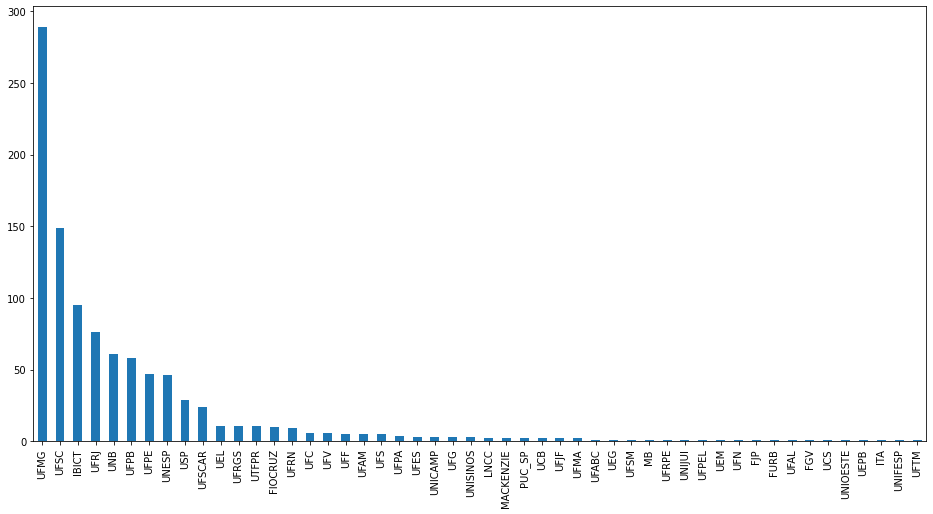

In [19]:
#grafico tipo barra usando o plot.bar()
bdtd.institutions.value_counts().plot.bar(figsize = (16,8));

## Data Publicação

In [20]:
# atribuir uma variável para armazena a contagem de documentos por ano
ano = bdtd.publicationDates.value_counts()
ano

2012    84
2017    73
2014    57
2005    56
2016    55
2015    55
2018    54
2013    52
2011    47
2019    45
2006    36
2001    34
2008    33
2004    30
2007    29
2003    26
2009    24
2010    23
2002    22
2000    22
1992    15
1999    14
1982    11
1997    10
1998     9
1996     7
1978     7
1983     7
1994     6
1987     6
1985     6
1990     5
1991     4
1975     4
1977     4
1979     4
1973     3
1972     3
1989     3
1993     3
1981     2
1988     2
1976     2
1974     2
1980     1
1984     1
1986     1
1995     1
Name: publicationDates, dtype: int64

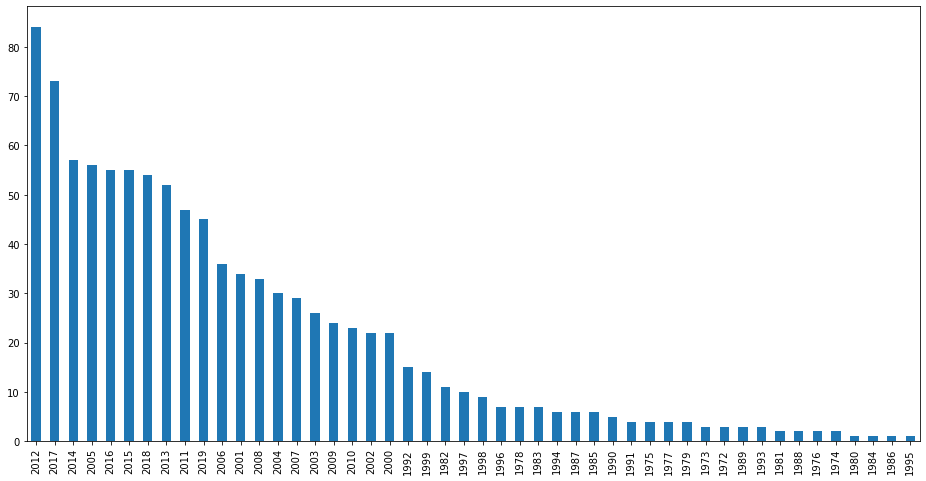

In [21]:
# plotando gráfico de barras com o método plot.par()
ano.plot.bar(figsize = (16,8));

## Doutorado ou Mestrado?

In [22]:
# Contagem de cada valor dentro da variável
bdtd.types.value_counts()

masterThesis                     771
doctoralThesis                   228
bachelorThesis|doctoralThesis      1
Name: types, dtype: int64

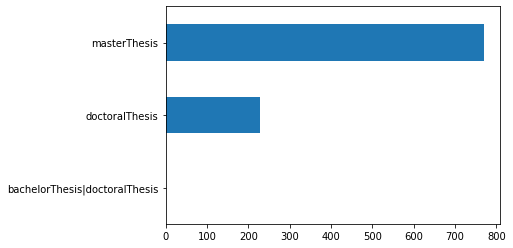

In [23]:
# Plotar gráfico horizontal com plot.barh()
bdtd.types.value_counts().sort_values().plot.barh();

## 20 Orientadores que mais orientaram

In [24]:
# 20 Orientadores mais frequentes, transformando a contagem em DataFrame
top20 = bdtd.contributors.value_counts().to_frame()

In [25]:
#reseta o Index do Dataframe para manipulação
top20.reset_index(level=0, inplace=True)

In [26]:
# Renomear as colunas
top20.columns = ['Orientador', 'Trabalhos Orientados']

In [27]:
# Visualizar a tabela
top20.head(20)

,Orientador,Trabalhos Orientados
0,Ricardo Rodrigues Barbosa,31
1,Marlene de Oliveira,17
2,Maria Aparecida Moura,15
3,Ursula Blattmann,14
4,Ana Maria Rezende Cabral,13
5,Rosali Fernandez de Souza,13
6,Regina Maria Marteleto,13
7,Ligia Maria Moreira Dumont,12
8,Lígia Maria Arruda Café,12
9,Isis Paim,11


##Tudo Acesso Aberto?

In [28]:
bdtd.accesslevel.value_counts()

openAccess         997
embargoedAccess      3
Name: accesslevel, dtype: int64

## Breve visualização dos Programas de Pós-Graduação

In [29]:
bdtd.programs.value_counts()

Programa de Pós-Graduação em Ciência da Informação                       180
Pós-Graduação em Ciência da Informação                                    47
Ciência da Informação                                                     25
Programa de Pos Graduacao em Ciencia da Informacao                        22
Programa de Pos Graduacao em Ciencia da Computacao                        12
                                                                        ... 
Programa de Pós-graduação em Ciência Política                              1
Programa de Pós-graduação em Química (Mestrado Profissional)               1
Programa de Pós-Graduação em Antropologia Social                           1
Curso de Mestrado em Administração Pública                                 1
Programa de Pós-graduação em Educação em Ciências e Matemática (PRPG)      1
Name: programs, Length: 69, dtype: int64

## Tudo em Português?

In [30]:
bdtd.languages.value_counts()

por    994
eng      1
Name: languages, dtype: int64

## Conclusão

# Instituições
UFMG, UFSC e IBICT são as instituições que mais produzem teses e dissertações na área.
# Data Publicação
2012 foi o ano com maior número de produções.
# Doutorado ou Mestrado? 
A maioria dos documentos são teses de metrado.
# Tudo acesso aberto?
Apenas três documentos não são de acesso aberto. 
# Tudo em Português?
Há um único documento em língua inglesa. 